In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [2]:
rc('animation',html='html5')

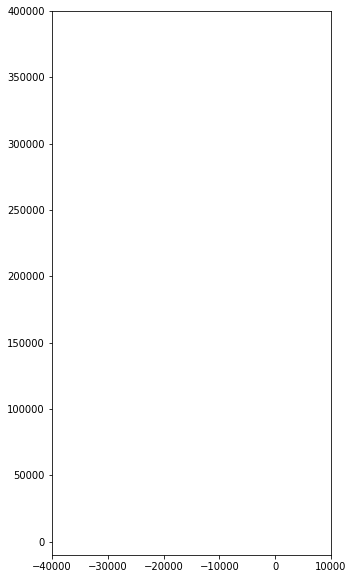

In [3]:
fig=plt.figure(figsize=(5,10))
ax=fig.add_subplot(1,1,1)
ax.set_xlim((-40000,10000))
ax.set_ylim((-10000,400000))

line,=ax.plot([],[],lw=2,markersize=4,marker='.',color='r') #플롯이 의도한 모양대로 나오는지 확인 

In [4]:
def init():
    line.set_data(([],[]))
    return(line,)

코리올리 힘의 작용 방향과 그 크기

$ \dfrac {d u} {d t} = gi +fv $

$ \dfrac {dv} {dt} = -fu $

여기서는 경사면(incle)에서 공을 굴리는 상황을 모사할 것입니다. 

In [5]:
#해석적 방법
def animate(i):
    t=np.arange(0,300000,300)
    g=9.8
    f=2*7.2E-5*np.sin(np.pi/6)
    incle=0.01
    X=-g*incle/(f**2)*(1-np.cos(f*t))/1000
    Y=g*incle/(f**2)*(f*t-np.sin(f*t))/1000
    x=X[:i]
    y=Y[:i]
    line.set_data(x,y)
    return(line,)

In [6]:
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=1000,interval=20,blit=True)
anim

In [7]:
#수치적 방법: 시간이 다소 걸립니다. 
def animate2(i):
    delt=3
    g=9.8
    f=2*7.2E-5*np.sin(np.pi/6)
    incle=0.01
    u=[]
    v=[]
    X=[]
    Y=[]
    u.append(0)
    v.append(0)
    X.append(0)
    Y.append(0)
    
    for ik in np.arange(0,i*100):
        u.append(u[ik]-g*incle*delt+f*v[ik]*delt)
        v.append(v[ik]-f*u[ik]*delt)
        X.append(X[ik]+u[ik]*delt/1000)
        Y.append(Y[ik]+v[ik]*delt/1000)
    x=X[::100]
    y=Y[::100]
    line.set_data(x,y)
    return(line,)
        

In [8]:
anim2=animation.FuncAnimation(fig,animate2,init_func=init,frames=1000,interval=20,blit=True)
anim2